# Supervised learning: Simple linear regression

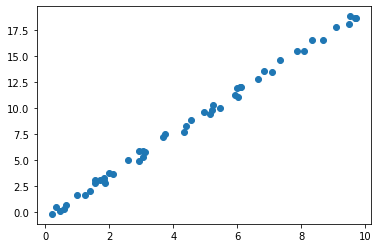

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x, y);

# 1. Choose a class of model

In [2]:
from sklearn.linear_model import LinearRegression

# 2. Instantiate the class and choose model hyperparameters (parameters that must be set before the model is fit to data)

In [3]:
# instantiate the LinearRegression class for instance by specifying to fit the intercept using the fit_intercept hyperparameter  
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 3. Arrange data into a features matrix and target vector

In [4]:
# X should be a matrix of size [n_samples, n_features]
X = x[:, np.newaxis]
X.shape

(50, 1)

In [5]:
# Target variable, y should be a n_smaples size array 
y.shape

(50,)

# 4. Fit the model to data

In [6]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# slope of the simple linear fit to the data
model.coef_

array([2.00660766])

In [8]:
# intercept of the simple linear fit to the data
model.intercept_

-0.5350275750799973

# 5. Predict labels for unknown data
## Once the model is trained, it is used to evaluate it <em>new data that was not part of the training set</em>.

In [9]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

In [10]:
yfit = model.predict(Xfit)

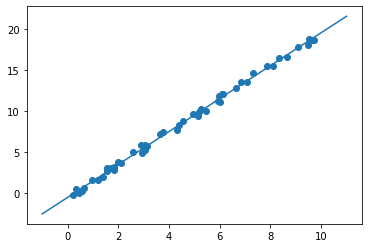

In [11]:
plt.scatter(x, y)
plt.plot(Xfit, yfit);

# Supervised learning example: Simple Gaussian naive Bayes
## It proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.
## Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification.

In [12]:
# import libraries
import seaborn as sns

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

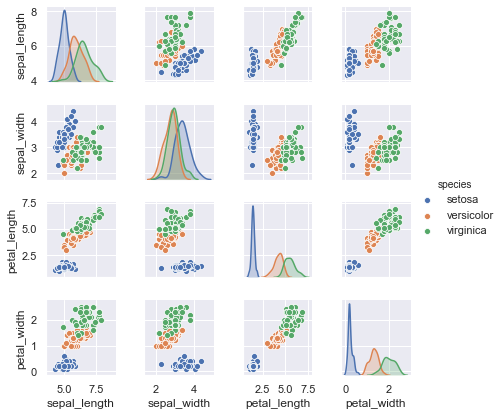

In [14]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [15]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [16]:
# target is to predict species
y_iris = iris['species']
y_iris.shape

(150,)

# First split the data into a training set and a testing set to avoid overfitting

In [125]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1) 

In [122]:
Xtrain.shape, Xtest.shape

((112, 4), (38, 4))

In [126]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to train data
y_model = model.predict(Xtest)              # 4. predict on test data

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Supervised learning example: KNN

In [64]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.40)

from sklearn.neighbors import KNeighborsClassifier  # 1. choose model class
model_knn = KNeighborsClassifier(n_neighbors=5)     # 2. instantiate model
model_knn.fit(Xtrain, ytrain)                       # 3. fit moedl to train data
y_model_knn = model_knn.predict(Xtest)              # 4. predict on tets data

from sklearn.metrics import accuracy_score          # 5. check model accuracy
accuracy_score(ytest, y_model_knn)

0.9833333333333333

# Model hyperparameter sensistivity analysis (sample test size and k as model complexity) 

In [120]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png")

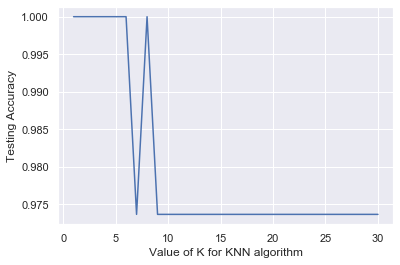

In [129]:
# does not follow the parabolic trend
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.25) # default sample test size of 0.25

# try k=1 through k=30 and record testing accuracy
k_range = range(1, 31)
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtrain, ytrain)
    y_model_knn = model_knn.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model_knn))
# plot testing accuracy versus model complexity
plt.plot(k_range, scores);
plt.xlabel('Value of K for KNN algorithm');
plt.ylabel('Testing Accuracy');

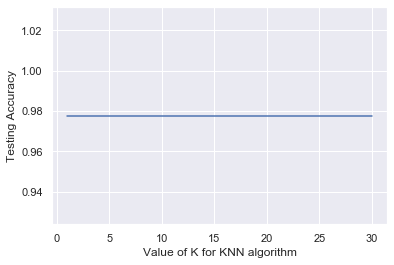

In [130]:
# does not follow the parabolic trend
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.3)

# try k=1 through k=30 and record testing accuracy
k_range = range(1, 31)
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtrain, ytrain)
    y_model_knn = model_knn.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model_knn))
# plot testing accuracy versus model complexity
plt.plot(k_range, scores);
plt.xlabel('Value of K for KNN algorithm');
plt.ylabel('Testing Accuracy');

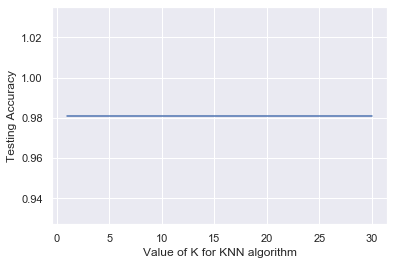

In [131]:
# does not follow the parabolic trend
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.35)

# try k=1 through k=30 and record testing accuracy
k_range = range(1, 31)
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtrain, ytrain)
    y_model_knn = model_knn.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model_knn))
# plot testing accuracy versus model complexity
plt.plot(k_range, scores);
plt.xlabel('Value of K for KNN algorithm');
plt.ylabel('Testing Accuracy');

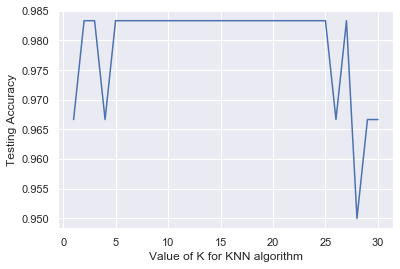

In [132]:
# Follows the parabolic trend
# Apparently, 40% of data is the optimum size to train data. Also, k = 5 is the optimum value that accounts for reasonable accuracy and complexity.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.40)

# try k=1 through k=30 and record testing accuracy
k_range = range(1, 31)
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtrain, ytrain)
    y_model_knn = model_knn.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model_knn))
# plot testing accuracy versus model complexity
plt.plot(k_range, scores);
plt.xlabel('Value of K for KNN algorithm');
plt.ylabel('Testing Accuracy');

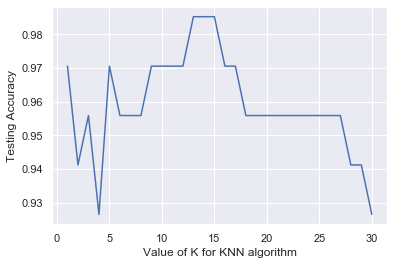

In [133]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.45)

# try k=1 through k=30 and record testing accuracy
k_range = range(1, 31)
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtrain, ytrain)
    y_model_knn = model_knn.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model_knn))
# plot testing accuracy versus model complexity
plt.plot(k_range, scores);
plt.xlabel('Value of K for KNN algorithm');
plt.ylabel('Testing Accuracy');

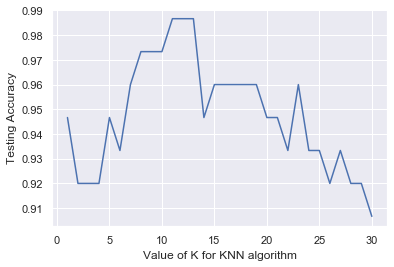

In [134]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1, test_size=0.50)

# try k=1 through k=30 and record testing accuracy
k_range = range(1, 31)
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtrain, ytrain)
    y_model_knn = model_knn.predict(Xtest)
    scores.append(accuracy_score(ytest, y_model_knn))
# plot testing accuracy versus model complexity
plt.plot(k_range, scores);
plt.xlabel('Value of K for KNN algorithm');
plt.ylabel('Testing Accuracy');

In [44]:
X_new = [[3, 5, 4, 2]]
model.predict(X_new)

array(['virginica'], dtype=object)

# Unsupervised learning: dimensionality reduction
## principal component analysis


In [20]:
from sklearn.decomposition import PCA       # 1. Choose the model class
model = PCA(n_components=2)                 # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)              # 4. Transform the data to two dimensions

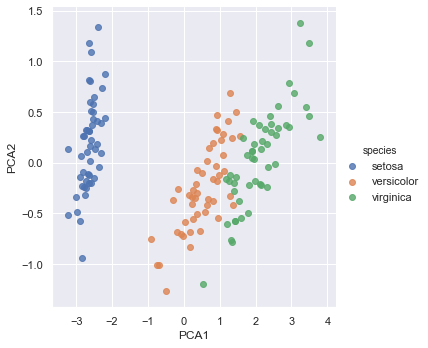

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# Unsupervised learning: clustering
## Gaussian mixture model (GMM)

In [22]:
from sklearn.mixture import GaussianMixture                     # 1. Choose the model class
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model with hyperparametrs
model.fit(X_iris)                                               # 3. Fit to data. Notice y is not specified.
y_gmm = model.predict(X_iris)                                   # 4. Determine cluster labels

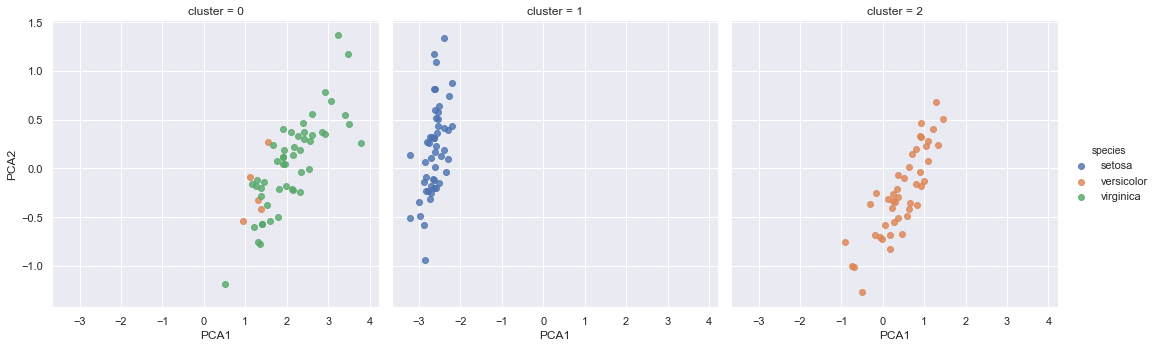

In [23]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);